In [6]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [32]:
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

mp_drawing= mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
def mediapipe_detect(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [53]:
def draw_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.face_landmarks,
            connections=mp_holistic.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 155, 0), thickness=1, circle_radius=1))

    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.pose_landmarks,
            connections=mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(100, 100, 0), thickness=2, circle_radius=2))

    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.left_hand_landmarks,
            connections=mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style())

    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.right_hand_landmarks,
            connections=mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style())

In [54]:
# Initialize OpenCV camera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Failed to open camera")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture image")
        break

    # Use the holistic model for detection
    image, results = mediapipe_detect(frame, holistic)

    # Draw landmarks on the image
    draw_landmarks(image, results)

    # Display the frame
    cv2.imshow('frame', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [47]:
results.face_landmarks.landmark

[x: 0.552669
y: 0.627458334
z: -0.0209708791
, x: 0.552062154
y: 0.595489264
z: -0.038433075
, x: 0.55104059
y: 0.605705559
z: -0.0197150707
, x: 0.543452
y: 0.563251913
z: -0.0296539161
, x: 0.551894486
y: 0.585303545
z: -0.0410110801
, x: 0.550902188
y: 0.572063088
z: -0.0381731726
, x: 0.547912598
y: 0.540419817
z: -0.0187115371
, x: 0.489910334
y: 0.540589511
z: 0.00327956397
, x: 0.546626866
y: 0.515270233
z: -0.0144286696
, x: 0.546447873
y: 0.501403689
z: -0.0163803492
, x: 0.544215798
y: 0.453224838
z: -0.0097227376
, x: 0.552833617
y: 0.632098317
z: -0.0200343467
, x: 0.552660942
y: 0.63553828
z: -0.0174986906
, x: 0.552267492
y: 0.636882305
z: -0.0141706457
, x: 0.552561581
y: 0.639582157
z: -0.0130015109
, x: 0.552889943
y: 0.643423557
z: -0.0140865427
, x: 0.553108931
y: 0.648471296
z: -0.0152026182
, x: 0.553010464
y: 0.653855562
z: -0.0135765839
, x: 0.552136958
y: 0.664218783
z: -0.00579585
, x: 0.551742554
y: 0.600701571
z: -0.0346136242
, x: 0.544808149
y: 0.600532353


In [48]:
draw_landmarks(frame, results)

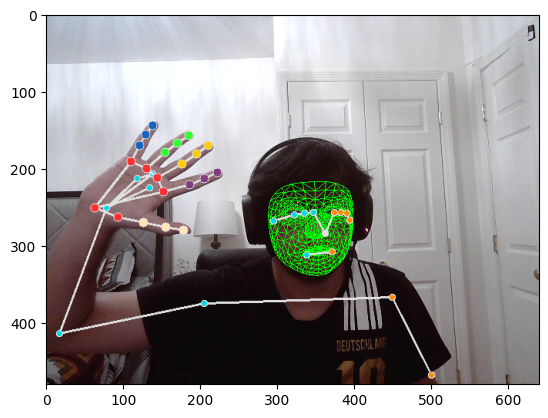

In [49]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# PRE PROC 

In [56]:
print(results.pose_landmarks.landmark)
print(results.left_hand_landmarks)
print(results.right_hand_landmarks)

[x: 0.562707782
y: 0.609025538
z: -1.147717
visibility: 0.999722064
, x: 0.580406487
y: 0.557190537
z: -1.13949227
visibility: 0.999362826
, x: 0.593696713
y: 0.557198524
z: -1.13936973
visibility: 0.999478161
, x: 0.605847239
y: 0.557148397
z: -1.13935983
visibility: 0.999293923
, x: 0.53550446
y: 0.555039108
z: -1.15149403
visibility: 0.999527514
, x: 0.516776502
y: 0.554974556
z: -1.15115571
visibility: 0.999647737
, x: 0.497637212
y: 0.556012094
z: -1.15126908
visibility: 0.999569893
, x: 0.608925164
y: 0.563842952
z: -0.785737574
visibility: 0.999347448
, x: 0.454197496
y: 0.564469576
z: -0.906924844
visibility: 0.999748111
, x: 0.576728284
y: 0.659956396
z: -1.00695205
visibility: 0.999668658
, x: 0.52743274
y: 0.666717529
z: -1.04004073
visibility: 0.999791622
, x: 0.689514399
y: 0.753714919
z: -0.422776878
visibility: 0.999188423
, x: 0.320143849
y: 0.82208097
z: -0.67912
visibility: 0.999046504
, x: 0.73031342
y: 0.956019819
z: 0.00719965249
visibility: 0.470624208
, x: 0.2368

In [57]:
for res in results.pose_landmarks.landmark:
    test= np.array([res.x,res.y,res.z,res.visibility])
test

array([ 4.64026928e-01,  2.50654912e+00, -3.13031882e-01,  1.80471325e-04])

In [62]:
results.pose_landmarks.landmark[0].x

0.562707781791687

In [64]:
pose=[]
for res in results.pose_landmarks.landmark:
    test= np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)
pose

[array([ 0.56270778,  0.60902554, -1.147717  ,  0.99972206]),
 array([ 0.58040649,  0.55719054, -1.13949227,  0.99936283]),
 array([ 0.59369671,  0.55719852, -1.13936973,  0.99947816]),
 array([ 0.60584724,  0.5571484 , -1.13935983,  0.99929392]),
 array([ 0.53550446,  0.55503911, -1.15149403,  0.99952751]),
 array([ 0.5167765 ,  0.55497456, -1.15115571,  0.99964774]),
 array([ 0.49763721,  0.55601209, -1.15126908,  0.99956989]),
 array([ 0.60892516,  0.56384295, -0.78573757,  0.99934745]),
 array([ 0.4541975 ,  0.56446958, -0.90692484,  0.99974811]),
 array([ 0.57672828,  0.6599564 , -1.00695205,  0.99966866]),
 array([ 0.52743274,  0.66671753, -1.04004073,  0.99979162]),
 array([ 0.6895144 ,  0.75371492, -0.42277688,  0.99918842]),
 array([ 0.32014385,  0.82208097, -0.67912   ,  0.9990465 ]),
 array([0.73031342, 0.95601982, 0.00719965, 0.47062421]),
 array([ 0.23681076,  1.14412045, -0.55233985,  0.65031248]),
 array([0.75024605, 1.29516637, 0.13420554, 0.34415153]),
 array([ 0.28389

In [77]:
pose= np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
pose

array([ 5.62707782e-01,  6.09025538e-01, -1.14771700e+00,  9.99722064e-01,
        5.80406487e-01,  5.57190537e-01, -1.13949227e+00,  9.99362826e-01,
        5.93696713e-01,  5.57198524e-01, -1.13936973e+00,  9.99478161e-01,
        6.05847239e-01,  5.57148397e-01, -1.13935983e+00,  9.99293923e-01,
        5.35504460e-01,  5.55039108e-01, -1.15149403e+00,  9.99527514e-01,
        5.16776502e-01,  5.54974556e-01, -1.15115571e+00,  9.99647737e-01,
        4.97637212e-01,  5.56012094e-01, -1.15126908e+00,  9.99569893e-01,
        6.08925164e-01,  5.63842952e-01, -7.85737574e-01,  9.99347448e-01,
        4.54197496e-01,  5.64469576e-01, -9.06924844e-01,  9.99748111e-01,
        5.76728284e-01,  6.59956396e-01, -1.00695205e+00,  9.99668658e-01,
        5.27432740e-01,  6.66717529e-01, -1.04004073e+00,  9.99791622e-01,
        6.89514399e-01,  7.53714919e-01, -4.22776878e-01,  9.99188423e-01,
        3.20143849e-01,  8.22080970e-01, -6.79120004e-01,  9.99046504e-01,
        7.30313420e-01,  

In [75]:
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
lh


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [76]:
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [74]:
np.zeros(21*3)  

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [79]:
face= np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
face

array([ 0.55409825,  0.64895475, -0.01508237, ...,  0.60521913,
        0.53201103,  0.0158662 ])

In [80]:
def extract_keypoints(results):
    pose= np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face= np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [81]:
extract_keypoints(results).shape

(1662,)

In [91]:
import os
dataset_path= os.path.join('data')
actions= np.array(['hello','thanks','iloveyou'])
no_sequences= 30
sequence_length= 30

In [92]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(dataset_path, action, str(sequence)))
        except FileExistsError:
            pass

In [ ]:
# Initialize OpenCV camera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Failed to open camera")
    exit()

for action in actions:

    for sequence in range(no_sequences):
        for frame_num in range(sequence_length):

            ret, frame = cap.read()

            if not ret:
                print("Failed to capture image")
                break

            # Use the holistic model for detection
            image, results = mediapipe_detect(frame, holistic)

            # Draw landmarks on the image
            draw_landmarks(image, results)

            if frame_num==0: #dataset collection starting   
                cv2.putText(image, 'STARTING COLLECTION',(120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),(15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                cv2.imshow('Camera', image)
                cv2.waitKey(2000)
            else:
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),(15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                cv2.imshow('Camera', image)
            keypoints= extract_keypoints(results) # save the keypoints 
            npy_path= os.path.join(dataset_path, action, str(sequence), str(frame_num))
            np.save(npy_path, keypoints)
            
            if cv2.waitKey(10) & 0xFF == ord('q'):   
                break
            


cap.release()
cv2.destroyAllWindows()

In [96]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [97]:
label_map= {label:num for num, label in enumerate(actions)}
label_map

{np.str_('hello'): 0, np.str_('thanks'): 1, np.str_('iloveyou'): 2}

In [98]:
sequences, labels= [], []
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res= np.load(os.path.join(dataset_path, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [99]:
np.array(sequences).shape

(90, 30, 1662)

In [100]:
np.array(labels).shape

(90,)

In [101]:
X= np.array(sequences)
y= to_categorical(labels).astype(int)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [103]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.05)
X_train.shape

(85, 30, 1662)

In [106]:
X_test.shape

(5, 30, 1662)

# Modelling

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard



In [108]:
log_dir= os.path.join('Logs') #training logs from tensorboard
tb_callback= TensorBoard(log_dir=log_dir)

In [109]:
model= Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


c:\Users\kabir\.vscode\Code Files\ctp-ds-project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [111]:
res= [.7, .1, .2]
actions[np.argmax(res)]

np.str_('hello')

In [112]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - categorical_accuracy: 0.4422 - loss: 1.1139
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.3483 - loss: 2.1610
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.4462 - loss: 1.5789
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2916 - loss: 2.4408
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.3425 - loss: 1.2623
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3837 - loss: 1.2958
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3326 - loss: 1.4641
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.3464 - loss: 1.2610
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.3190 - loss: 1.2221
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.4051 - loss: 1.0480
Epoch 11/1000
3/3 ━━━━━━━━━━━

In [113]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [114]:
res= model.predict(X_test)
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


array([[6.96989444e-09, 9.14507944e-13, 1.00000000e+00],
       [2.65871272e-08, 8.91426368e-15, 1.00000000e+00],
       [1.09173406e-10, 1.16911460e-14, 1.00000000e+00],
       [3.45663720e-10, 1.79267246e-12, 1.00000000e+00],
       [2.37981385e-10, 1.47988609e-13, 1.00000000e+00]], dtype=float32)

In [123]:
actions[np.argmax(res[2])]==actions[np.argmax(y_test[2])] #checking if the prediction is correct

True

In [124]:
model.save('action.h5')

In [136]:
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, confusion_matrix
yhat= model.predict(X_train)
y_true= np.argmax(y_train, axis=1).tolist()
yhat=np.argmax(yhat, axis=1).tolist()



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [133]:
multilabel_confusion_matrix(y_true, yhat)

array([[[55,  0],
        [ 0, 30]],

       [[55,  0],
        [ 0, 30]],

       [[60,  0],
        [ 0, 25]]])

In [137]:
confusion_matrix(y_true, yhat)

array([[30,  0,  0],
       [ 0, 30,  0],
       [ 0,  0, 25]])

In [138]:
accuracy_score(y_true, yhat)

1.0

Amazing results!!!!!

In [141]:
# Initialize OpenCV camera
cap = cv2.VideoCapture(0)
sequence= []
sentence= []
threshold= 0.4

# Initialize OpenCV camera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Failed to open camera")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture image")
        break

    # Use the holistic model for detection
    image, results = mediapipe_detect(frame, holistic)

    # Draw landmarks on the image
    draw_landmarks(image, results)

    #prediction logic
    keypoints= extract_keypoints(results)
    sequence.append(keypoints)
    sequence= sequence[-30:]
    if len(sequence)==30:
        res= model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        #sentence.append(actions[np.argmax(res)])

    # visualize the prediction
    if np.any(res[np.argmax(res)] > threshold):
        if len(sentence)>0:
            if actions[np.argmax(res)]!=sentence[-1]:
                sentence.append(actions[np.argmax(res)])
        else:
            sentence.append(actions[np.argmax(res)])

    if len(sentence)>5:
        sentence= sentence[-5:]
    cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
    cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)  
    # Display the frame
    cv2.imshow('frame', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms

In [144]:
colors= [(245, 117, 16), (117, 245, 16), (16, 117, 245), (245, 16, 117), (117, 16, 245)]
def prob_visualize(res,actions,input_frame,colors):
    output_frame= input_frame.copy()
    for num,prob in enumerate(res):
        cv2.rectangle(output_frame, (0, int(num*40)), (int(prob*100), int((num+1)*40)), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, int(num*40+30)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_visualize(res,actions,frame,colors))

In [155]:
# Initialize OpenCV camera
cap = cv2.VideoCapture(0)
sequence= []
sentence= []
predictions= []
threshold= 0.8

# Initialize OpenCV camera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Failed to open camera")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture image")
        break

    # Use the holistic model for detection
    image, results = mediapipe_detect(frame, holistic)

    # Draw landmarks on the image
    draw_landmarks(image, results)

    #prediction logic
    keypoints= extract_keypoints(results)
    sequence.append(keypoints)
    sequence= sequence[-30:]
    if len(sequence)==30:
        res= model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        predictions.append(np.argmax(res))

    # visualize the prediction
    if np.any(res[np.argmax(res)] > threshold):
        if res[np.argmax(res)] > threshold:
            if len(sentence)>0:
                if actions[np.argmax(res)]!=sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])

    if len(sentence)>5:
        sentence= sentence[-5:]

    #visualize the probabilities
    image= prob_visualize(res,actions,image,colors)

    cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
    cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)  
    # Display the frame
    cv2.imshow('frame', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
iloveyou
1/1 ━━━━━━━━━